# Exploratory Data Analysis: pre_ml features

This notebook explores the features in the `pre_ml.db` database to understand distributions, identify outliers, and validate data quality.

In [16]:
con.close()

In [27]:
import duckdb
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set visual style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

# Database path
DB_PATH = "../../data/pre_ml.db"

# Connect to DuckDB
con = duckdb.connect(DB_PATH)

def load_query(query):
    return con.execute(query).df()

## 1. Table: `coordinates`

Exploring the spatial distribution of charging stations.

In [28]:
df_coords = load_query("SELECT * FROM coordinates")
display(df_coords.head())
print(f"Total stations: {len(df_coords)}")

,station_id,CIDADE,MORADA,LATITUDE,LONGITUDE
0,ABF-00008,Albufeira,Cerro da Lagoa,37.090700,-8.243906
1,ABF-00009,Albufeira,Vila Gale Cerro Alagoa,37.091404,-8.242397
2,ABF-00011,Albufeira,Praia Maria Luísa,37.091771,-8.205087
3,ABF-00012,Albufeira,"LUGAR VALVERDE - TAVAGUEIRA, GUIA",37.129463,-8.282082
4,ABF-00013,Albufeira,"LUGAR VALVERDE - TAVAGUEIRA, GUIA",37.129463,-8.282082


Total stations: 7099


In [29]:
# Interactive plot by city
fig = px.scatter(df_coords, 
                 x="LONGITUDE", 
                 y="LATITUDE", 
                 color="CIDADE", 
                 hover_name="station_id",
                 title="Charging Stations Distribution by City",
                 labels={"LONGITUDE": "Longitude", "LATITUDE": "Latitude"})

fig.update_layout(legend_title_text='City', height=1000)
fig.show()

## 2. Table: `indicators`

Analyzing socioeconomic indicators per station.

In [6]:
df_indicators = load_query("SELECT * FROM indicators")
display(df_indicators.head())

# Summary statistics
display(df_indicators.describe())

,station_id,population,tourism_pressure,num_households,avg_income,median_income,p90_income,gini_index,num_taxpayers
0,ABF-00008,4276.0,1.445978,32060.0,17496.0,12053.0,34333.0,40.8,40674.0
1,ABF-00009,3222.0,0.796710,32060.0,17496.0,12053.0,34333.0,40.8,40674.0
2,ABF-00011,144.0,3.402778,32060.0,17496.0,12053.0,34333.0,40.8,40674.0
3,ABF-00012,26.0,0.000000,32060.0,17496.0,12053.0,34333.0,40.8,40674.0
4,ABF-00013,26.0,0.000000,32060.0,17496.0,12053.0,34333.0,40.8,40674.0


,population,tourism_pressure,num_households,avg_income,median_income,p90_income,gini_index,num_taxpayers
count,7099.000000,7099.000000,7099.000000,7099.000000,7099.000000,7099.000000,7099.000000,7099.000000
mean,3331.083955,0.461424,96922.291449,23109.190168,15229.918017,47949.425835,41.179265,126647.964079
std,3534.562862,3.829257,106735.775990,4648.048867,1808.922772,12157.247968,4.127840,133724.218425
min,0.000000,0.000000,727.000000,13027.000000,9860.000000,25655.000000,32.300000,1021.000000
25%,561.000000,0.002048,20671.000000,19692.000000,13935.000000,37912.000000,38.200000,29623.000000
50%,2085.000000,0.019203,48289.000000,21830.000000,15000.000000,45226.000000,40.300000,67318.000000
75%,5424.000000,0.101616,118281.000000,27261.000000,16965.000000,60357.000000,44.300000,157140.000000
max,22990.000000,101.571429,342316.000000,32306.000000,20550.000000,70360.000000,48.500000,429463.000000


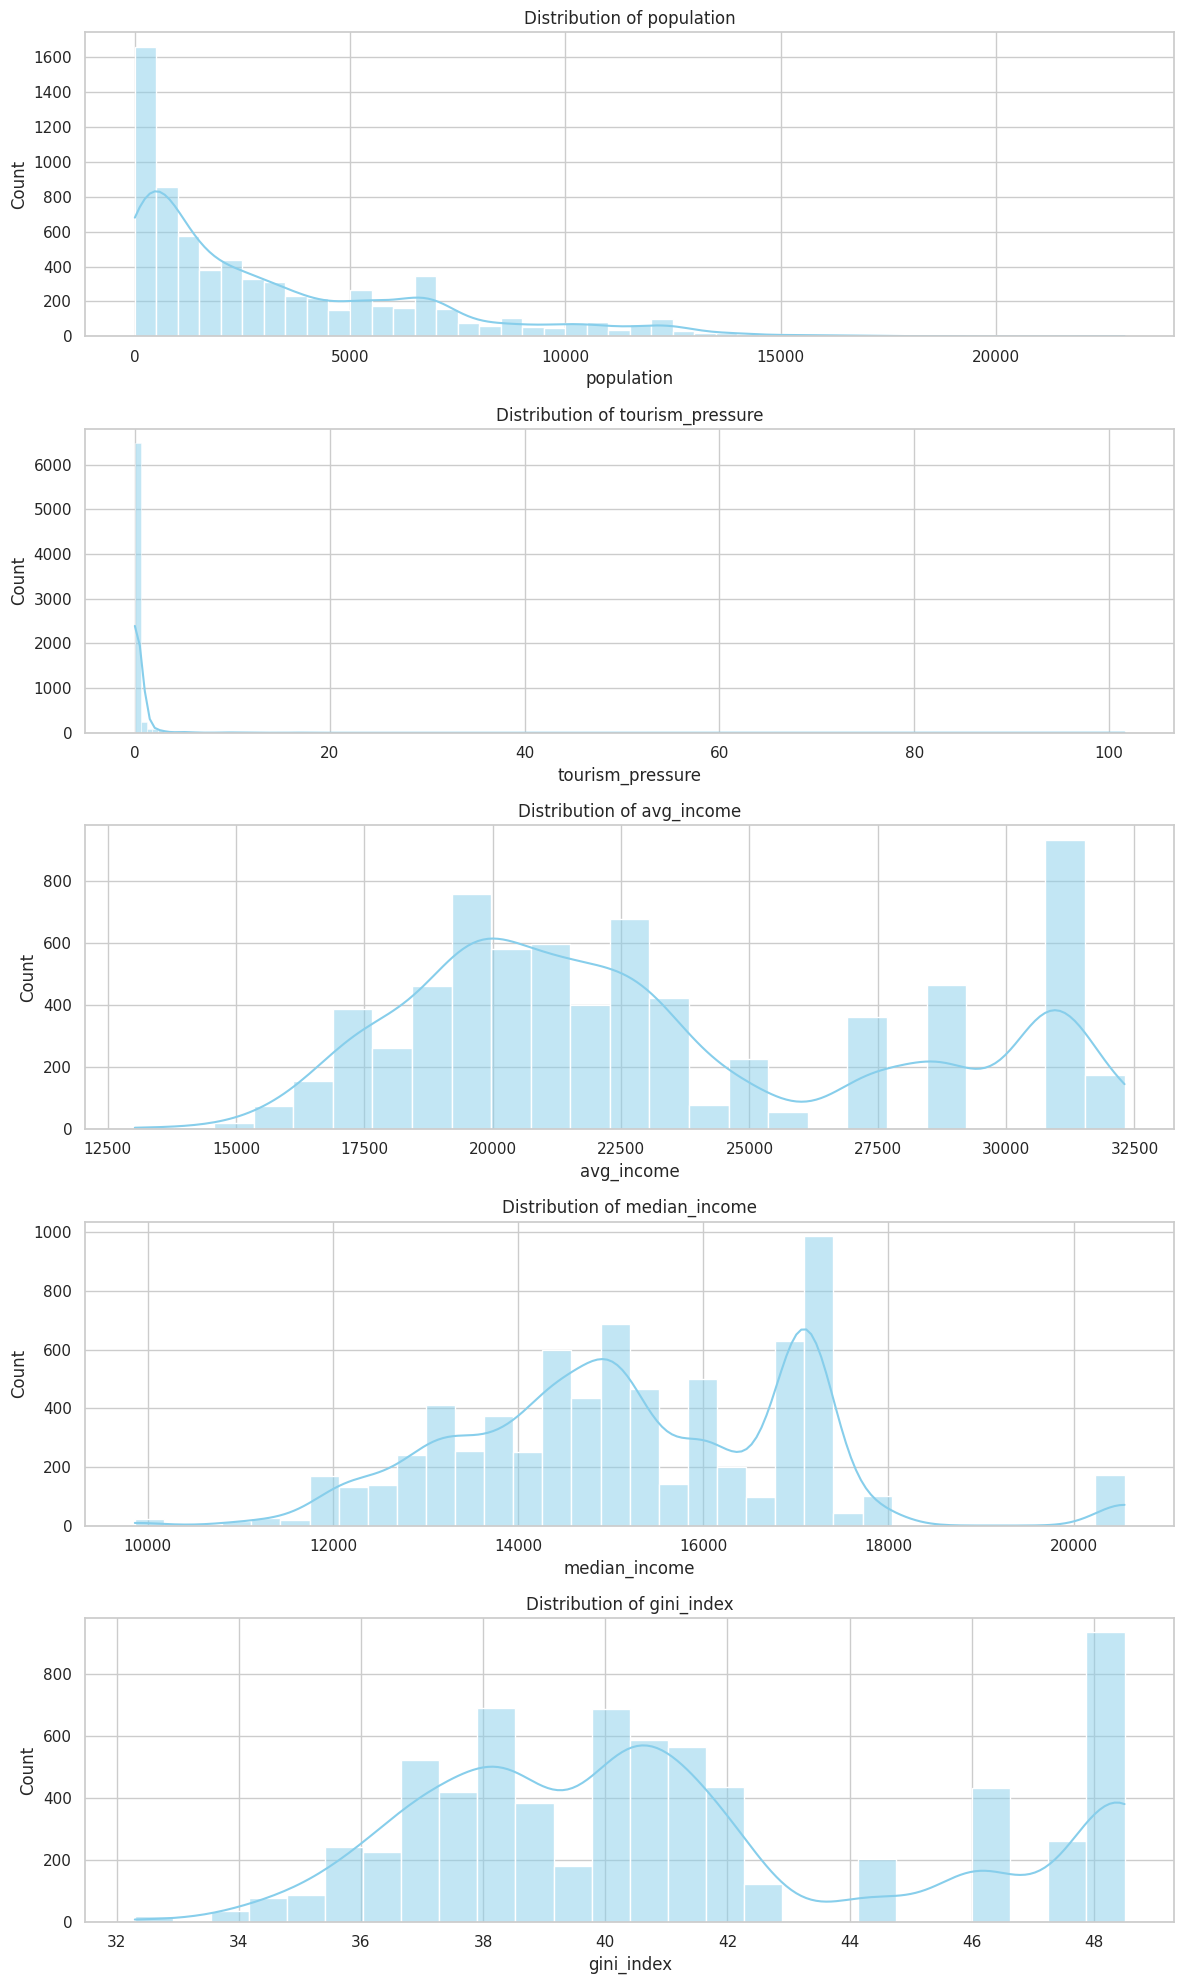

In [8]:
# Plot distributions
cols_to_plot = ['population', 'tourism_pressure', 'avg_income', 'median_income', 'gini_index']

fig, axes = plt.subplots(len(cols_to_plot), 1, figsize=(12, 4 * len(cols_to_plot)))
for i, col in enumerate(cols_to_plot):
    sns.histplot(df_indicators[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

## 3. Table: `prices`

Analyzing pricing models across sockets and tariffs.

In [9]:
df_prices = load_query("SELECT * FROM prices")
display(df_prices.head())
print(f"Total price records: {len(df_prices)}")

# Basic stats on categorical types
print("\nTariff Types:")
print(df_prices['TIPO_TARIFA'].value_counts())

print("\nTariff Models:")
print(df_prices['TIPO_TARIFARIO'].value_counts())

,station_ID,UID_TOMADA,TIPO_TARIFARIO,TIPO_TARIFA,TARIFA
0,ABF-00008,PT-EDP-EABF-00008-1-1,NaN,FLAT,€ 0.261 /charge
1,ABF-00008,PT-EDP-EABF-00008-1-1,NaN,ENERGY,€ 0.1 /kWh
2,ABF-00008,PT-EDP-EABF-00008-1-1,NaN,TIME,€ 0.015 /min
3,ABF-00009,PT-EDP-EABF-00009-1-1,NaN,FLAT,€ 0.261 /charge
4,ABF-00009,PT-EDP-EABF-00009-1-1,NaN,ENERGY,€ 0.1 /kWh


Total price records: 41382

Tariff Types:
TIPO_TARIFA
TIME            16118
FLAT            13528
ENERGY          11486
PARKING_TIME      146
Name: count, dtype: int64

Tariff Models:
TIPO_TARIFARIO
REGULAR           32315
AD_HOC_PAYMENT     2760
Name: count, dtype: int64


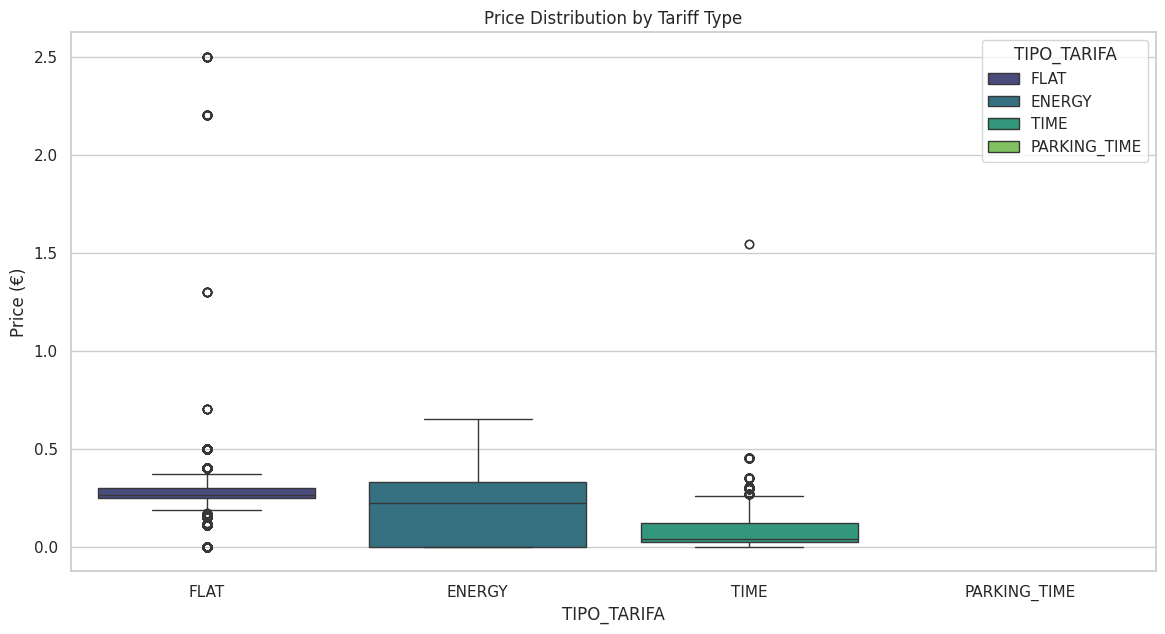

In [10]:
import re

def extract_price(tarifa_str):
    if pd.isna(tarifa_str):
        return None
    # Match decimals/integers following € symbol
    match = re.search(r'€\s*([\d.]+)', tarifa_str)
    if match:
        return float(match.group(1))
    return None

df_prices['price_value'] = df_prices['TARIFA'].apply(extract_price)

# Price distribution by type
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_prices, x='TIPO_TARIFA', y='price_value', hue='TIPO_TARIFA', palette='viridis')
plt.title('Price Distribution by Tariff Type')
plt.ylabel('Price (€)')
plt.show()

## 4. Table: `station_configuration`

Physical hardware metrics.

In [22]:
df_config = load_query("SELECT * FROM station_configuration")
display(df_config.head())

# Power distribution
# The column name has a comma in the example report but maybe it's a dot in DuckDB if parsed as float
# Let's check column names first
print(df_config.columns.tolist())

,station_ID,UID DA TOMADA,TIPO DE CARREGAMENTO,NÍVEL DE TENSÃO,TIPO DE TOMADA,FORMATO DA TOMADA,POTÊNCIA DA TOMADA (kW)
0,ABF-00008,PT-EDP-EABF-00008-1,Potência Normal Médio,Média Tensão,Mennekes,SOCKET,"7,4"
1,ABF-00009,PT-EDP-EABF-00009-1,Potência Normal Médio,Média Tensão,Mennekes,SOCKET,"7,4"
2,ABF-00011,ABF-00011-01,Potência Normal Médio,Baixa Tensão Especial,Mennekes,SOCKET,22
3,ABF-00011,ABF-00011-02,Potência Normal Médio,Baixa Tensão Especial,Mennekes,SOCKET,22
4,ABF-00012,ABF-00012-01,Potência Normal Médio,Média Tensão,Mennekes,SOCKET,22


['station_ID', 'UID DA TOMADA', 'TIPO DE CARREGAMENTO', 'NÍVEL DE TENSÃO', 'TIPO DE TOMADA', 'FORMATO DA TOMADA', 'POTÊNCIA DA TOMADA (kW)']


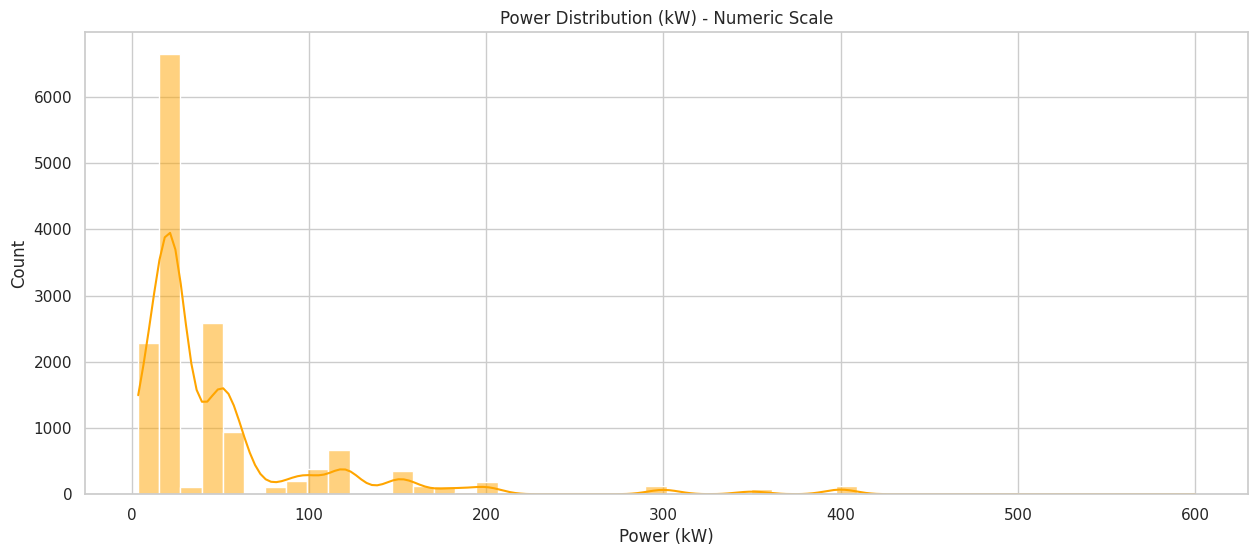

/tmp/ipykernel_25316/1147224564.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




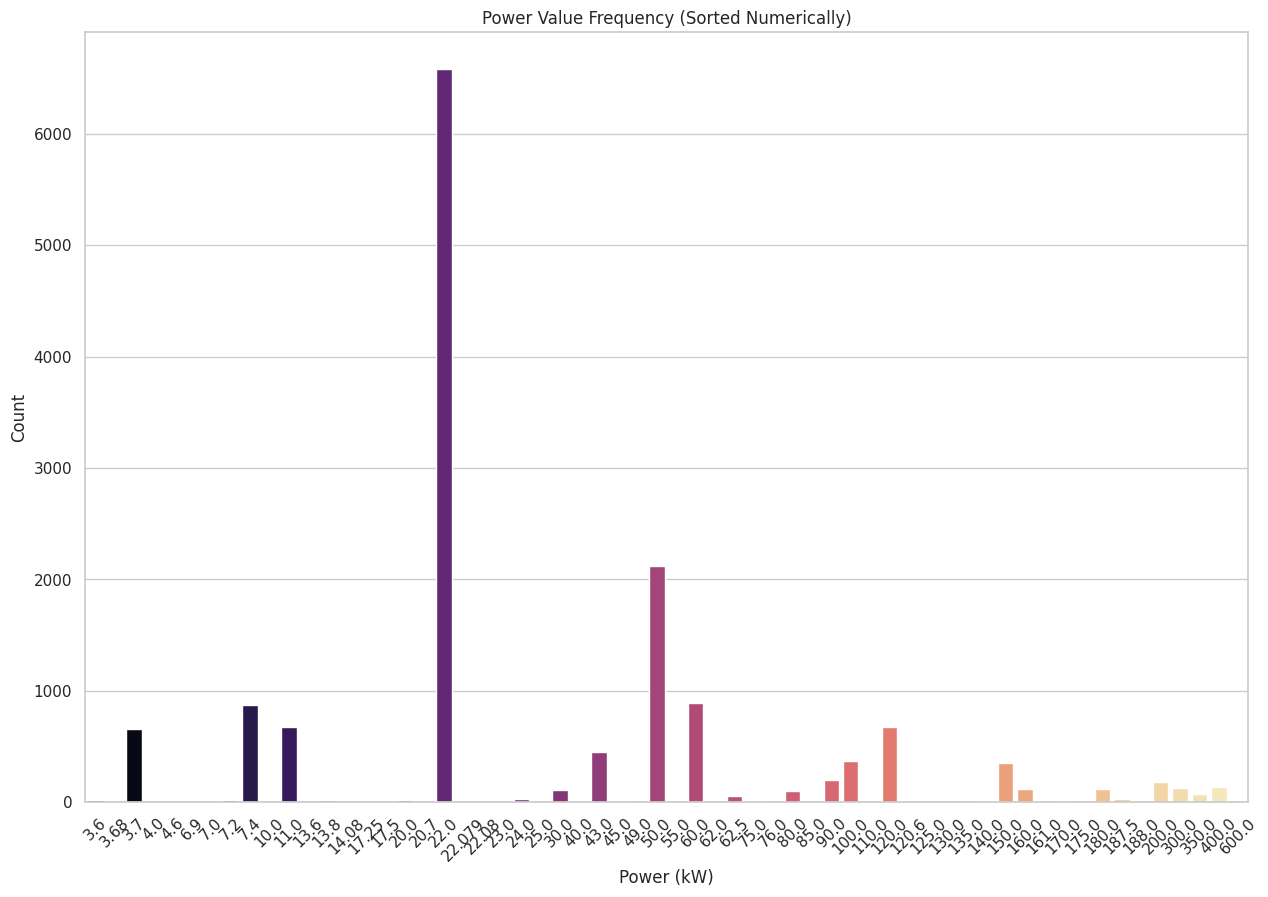

/tmp/ipykernel_25316/1147224564.py:53: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_25316/1147224564.py:53: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_25316/1147224564.py:53: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_25316/1147224564.py:53: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



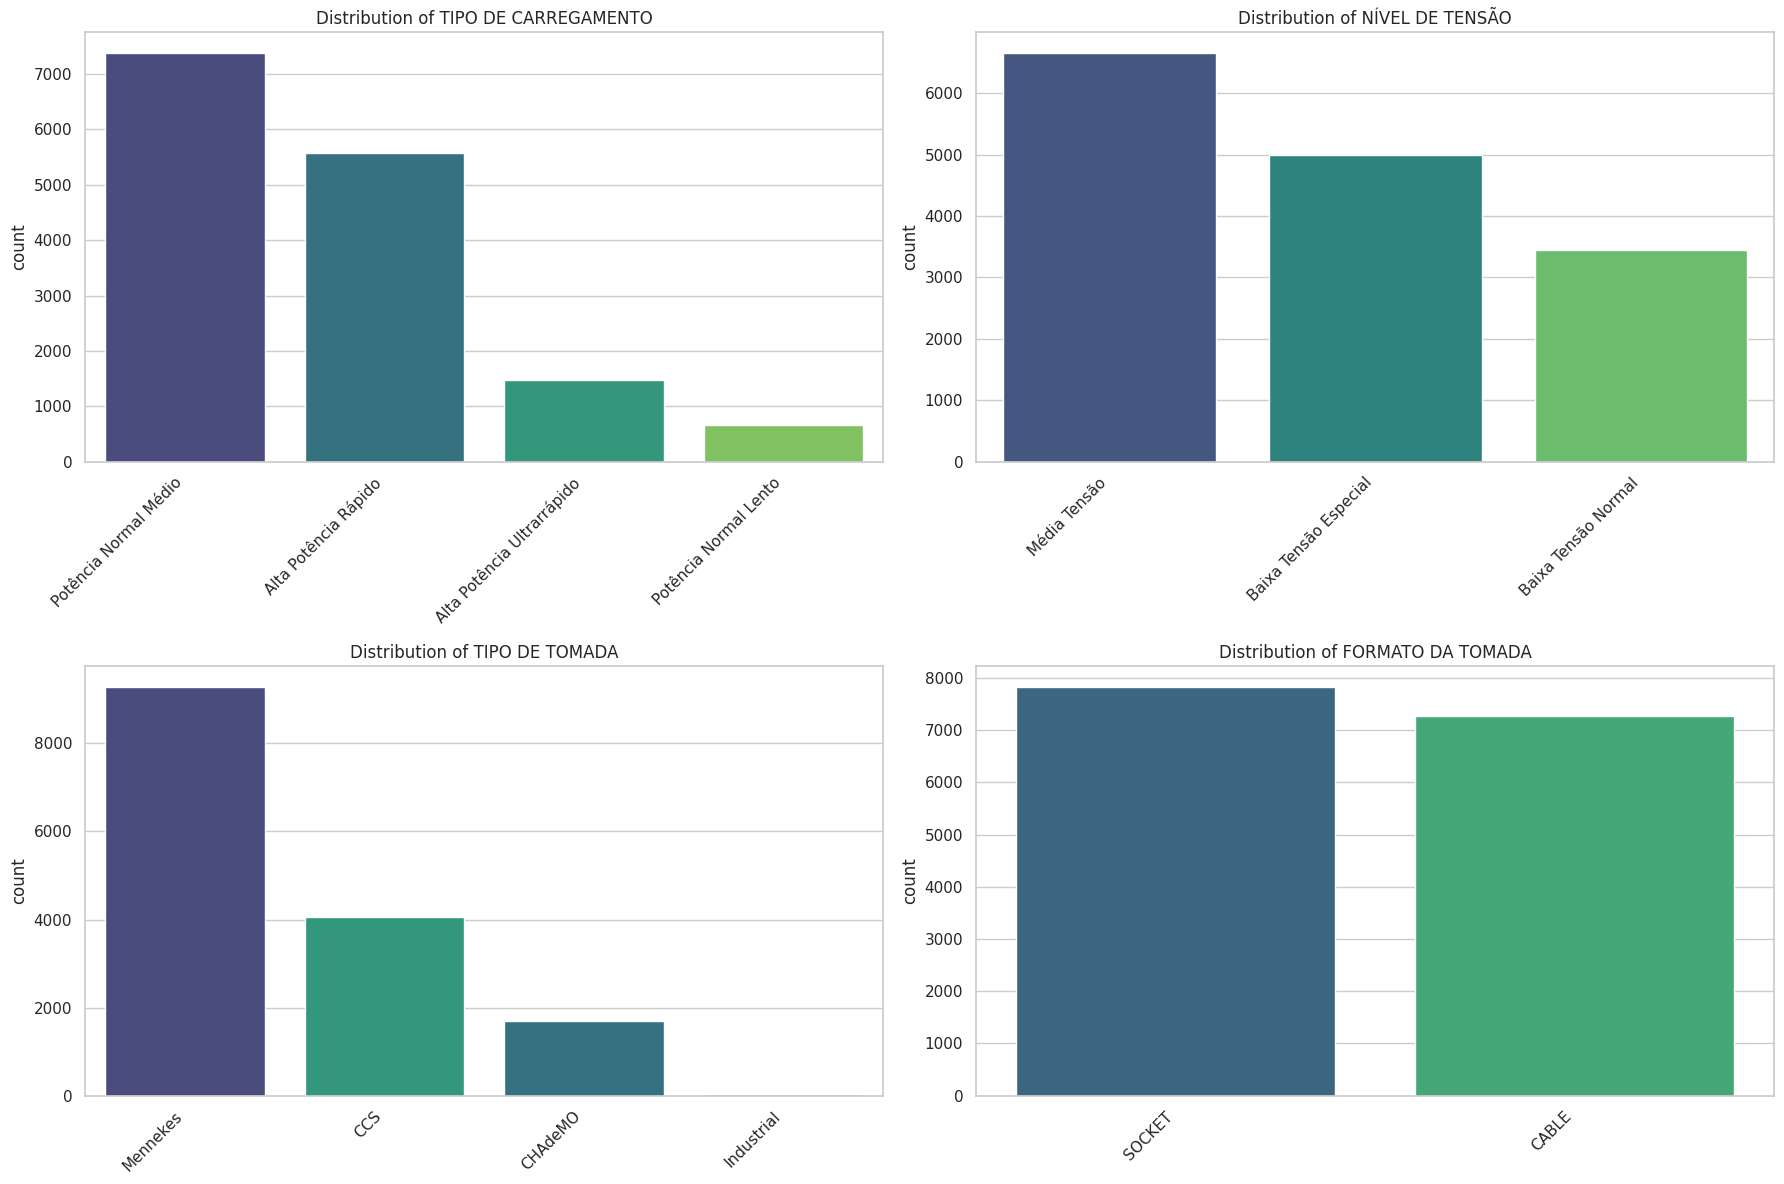

In [24]:
# 2. Power Distribution (Numeric Refinement)
def clean_power(val):
    if pd.isna(val): return None
    if isinstance(val, (int, float)): return float(val)
    try:
        clean_val = str(val).replace(',', '.')
        return float(clean_val)
    except:
        return None

df_config['power_numeric'] = df_config[power_col].apply(clean_power)

# Numeric Scale Plot
plt.figure(figsize=(15, 6))
sns.histplot(df_config['power_numeric'].dropna(), kde=True, color='orange', bins=50)
plt.title('Power Distribution (kW) - Numeric Scale')
plt.xlabel('Power (kW)')
plt.show()

# Sorted Frequency Plot
plt.figure(figsize=(15, 10))
sorted_counts = df_config.groupby('power_numeric').size().sort_index()
sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette='magma')
plt.title('Power Value Frequency (Sorted Numerically)')
plt.xticks(rotation=45)
plt.xlabel('Power (kW)')
plt.ylabel('Count')
plt.show()

# Categorical Distributions
categorical_cols = [
    'TIPO DE CARREGAMENTO', 
    'NÍVEL DE TENSÃO', 
    'TIPO DE TOMADA', 
    'FORMATO DA TOMADA'
]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if col in df_config.columns:
        sns.countplot(
            data=df_config, 
            x=col, 
            ax=axes[i], 
            palette='viridis', 
            hue=col, 
            legend=False, 
            order=df_config[col].value_counts().index
        )
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        axes[i].set_xlabel('')
    else:
        axes[i].set_title(f'Column {col} not found')

plt.tight_layout()
plt.show()


## 5. Table: `station_distances`

Proximity to Points of Interest.

In [30]:
df_dist = load_query("SELECT * FROM station_distances")
display(df_dist.head())

# We have a lot of columns. Let's focus on the counts vs distances for common POIs
dist_cols = [c for c in df_dist.columns if c.endswith('_dist')]
count_cols = [c for c in df_dist.columns if c.endswith('_count')]

print(f"Number of POI categories: {len(dist_cols)}")

,station_id,parking_count,parking_dist,parking_space_count,parking_space_dist,restaurant_count,restaurant_dist,bench_count,bench_dist,cafe_count,...,motel_count,motel_dist,theme_park_count,theme_park_dist,zoo_count,zoo_dist,alpine_hut_count,alpine_hut_dist,wine_cellar_count,wine_cellar_dist
0,ABF-00008,0,-1.0,0,-1.0,4,263.0,3,97.0,4,...,0,-1.0,0,-1.0,0,-1.0,0,-1.0,0,-1.0
1,ABF-00009,0,-1.0,0,-1.0,1,266.0,0,-1.0,1,...,0,-1.0,0,-1.0,0,-1.0,0,-1.0,0,-1.0
2,ABF-00011,0,-1.0,0,-1.0,1,339.0,0,-1.0,0,...,0,-1.0,0,-1.0,0,-1.0,0,-1.0,0,-1.0
3,ABF-00012,0,-1.0,0,-1.0,0,-1.0,0,-1.0,0,...,0,-1.0,0,-1.0,0,-1.0,0,-1.0,0,-1.0
4,ABF-00013,0,-1.0,0,-1.0,0,-1.0,0,-1.0,0,...,0,-1.0,0,-1.0,0,-1.0,0,-1.0,0,-1.0


Number of POI categories: 231


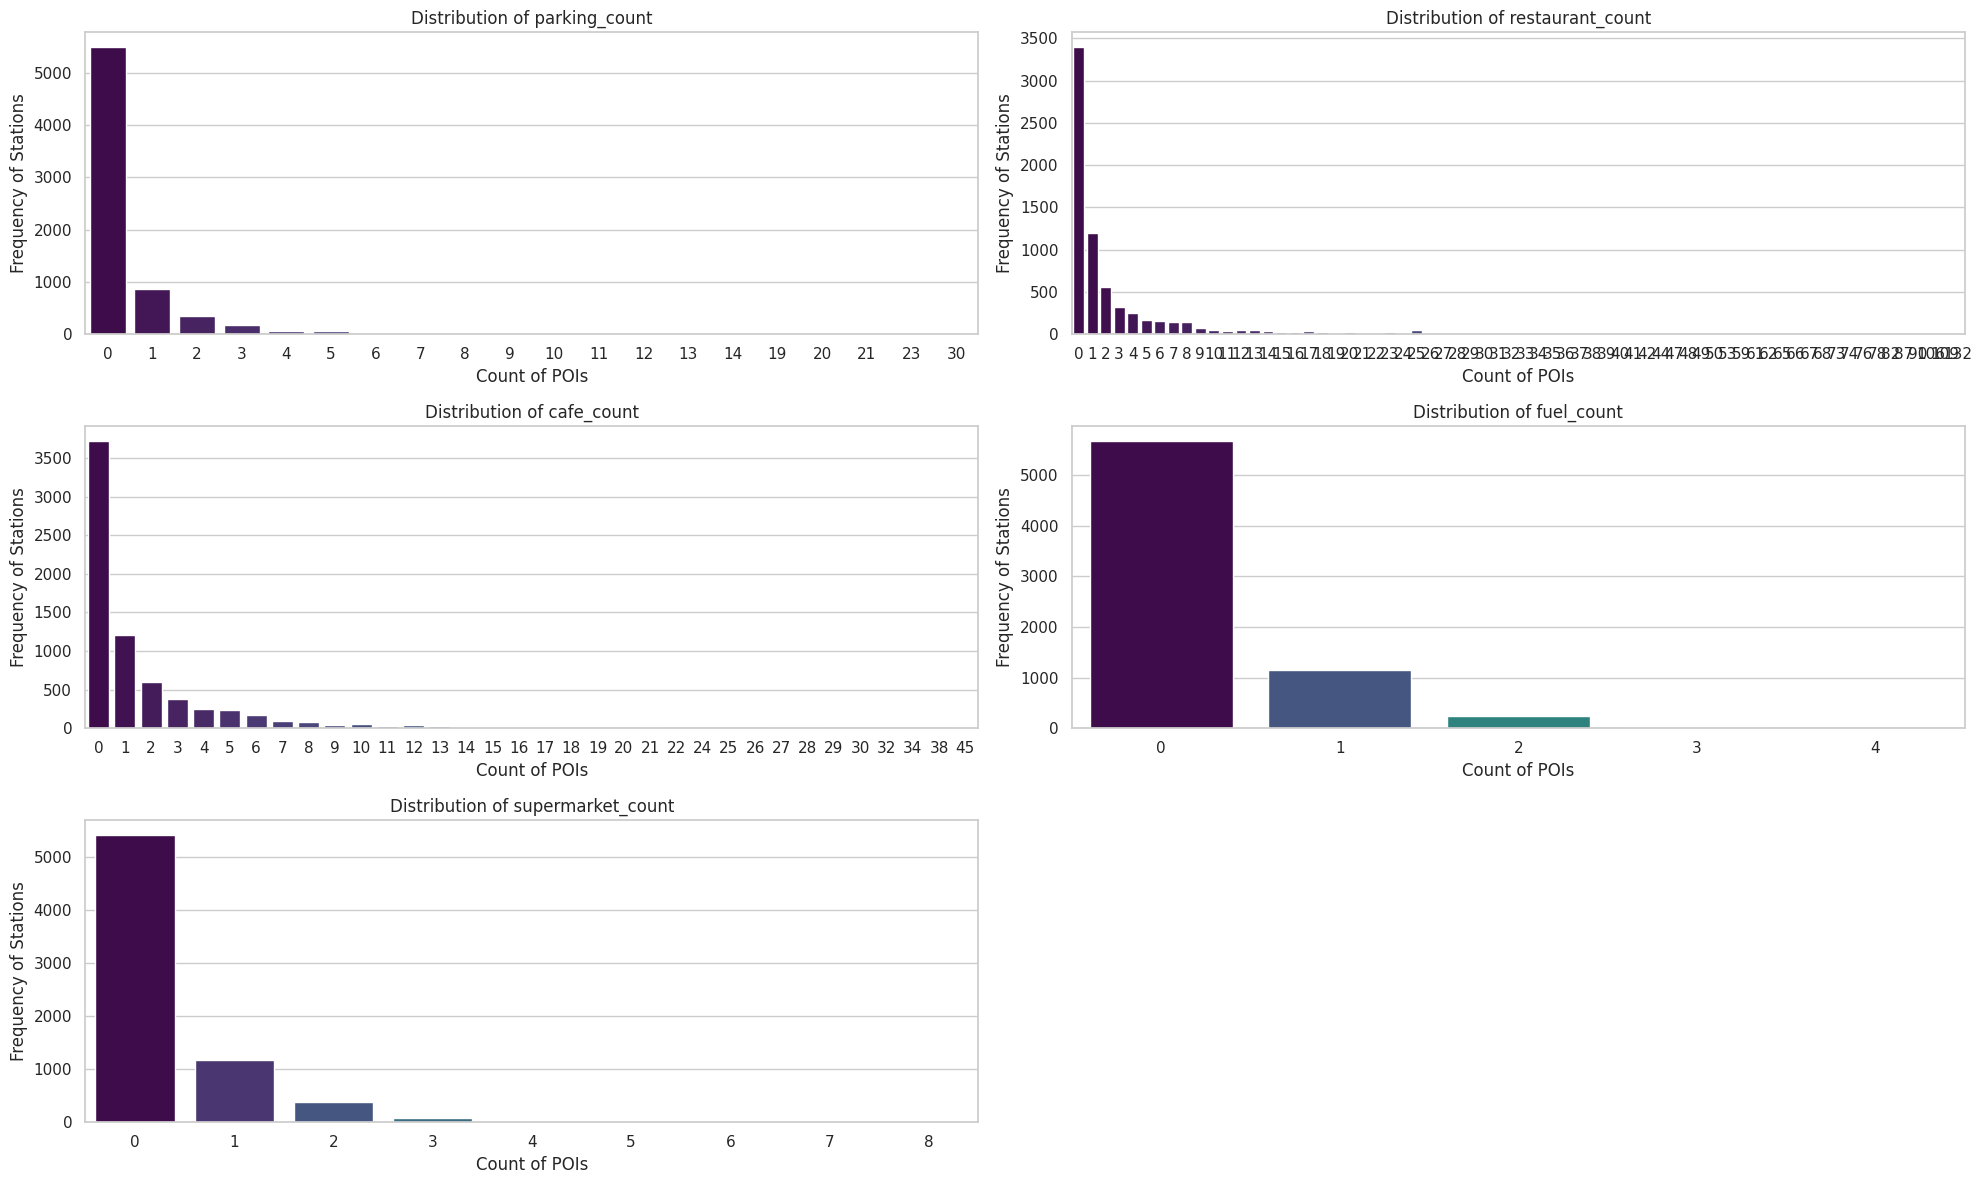

In [32]:
# Counterpart count distributions for requested POIs
count_cols_requested = [
    'parking_count', 
    'restaurant_count', 
    'cafe_count', 
    'fuel_count', 
    'supermarket_count'
]
available_count_cols = [c for c in count_cols_requested if c in df_dist.columns]

plt.figure(figsize=(20, 12))
for i, col in enumerate(available_count_cols):
    plt.subplot(3, 2, i+1)
    # Using barplot of value counts to see distribution of counts accurately
    counts = df_dist[col].value_counts().sort_index()
    sns.barplot(x=counts.index, y=counts.values, palette='viridis', hue=counts.index, legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count of POIs')
    plt.ylabel('Frequency of Stations')

plt.tight_layout()
plt.show()

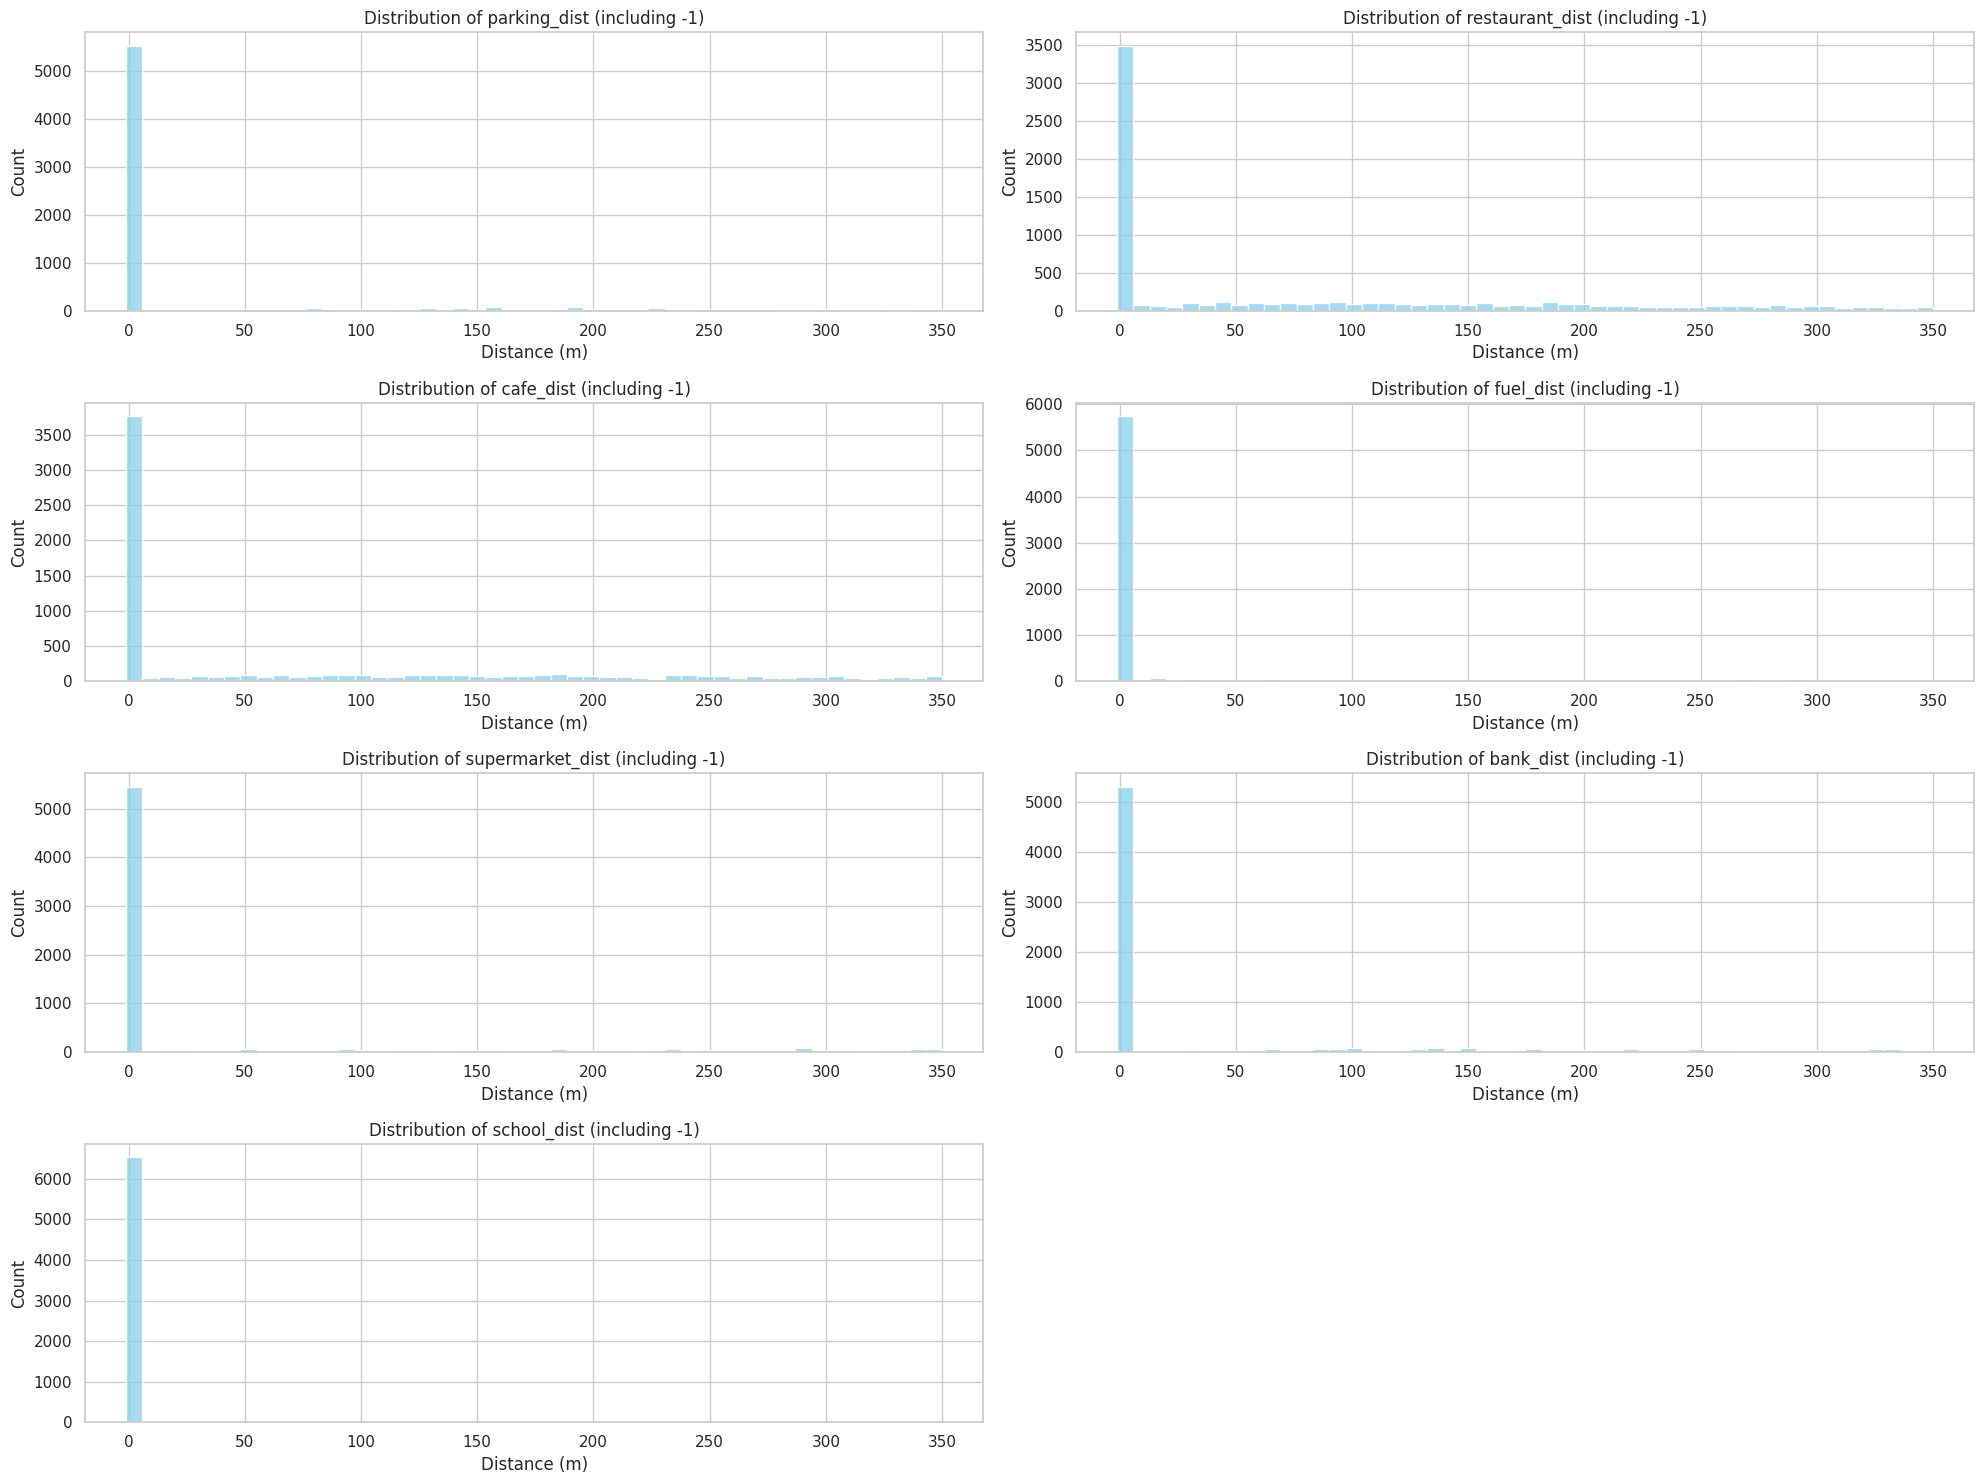

In [31]:
# Plotting distance distributions including -1 values
dist_cols = [c for c in df_dist.columns if c.endswith('_dist')]
# Filter for some representative POIs to keep it readable, or plot all if needed.
# Let's focus on the main ones: parking, restaurant, cafe, fuel, supermarket, bank, school
selected_dist_pois = ['parking_dist', 'restaurant_dist', 'cafe_dist', 'fuel_dist', 'supermarket_dist', 'bank_dist', 'school_dist']
available_dist_cols = [c for c in selected_dist_pois if c in df_dist.columns]

plt.figure(figsize=(20, 15))
for i, col in enumerate(available_dist_cols):
    plt.subplot(4, 2, i+1)
    sns.histplot(df_dist[col], kde=False, bins=50, color='skyblue')
    plt.title(f'Distribution of {col} (including -1)')
    plt.xlabel('Distance (m)')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

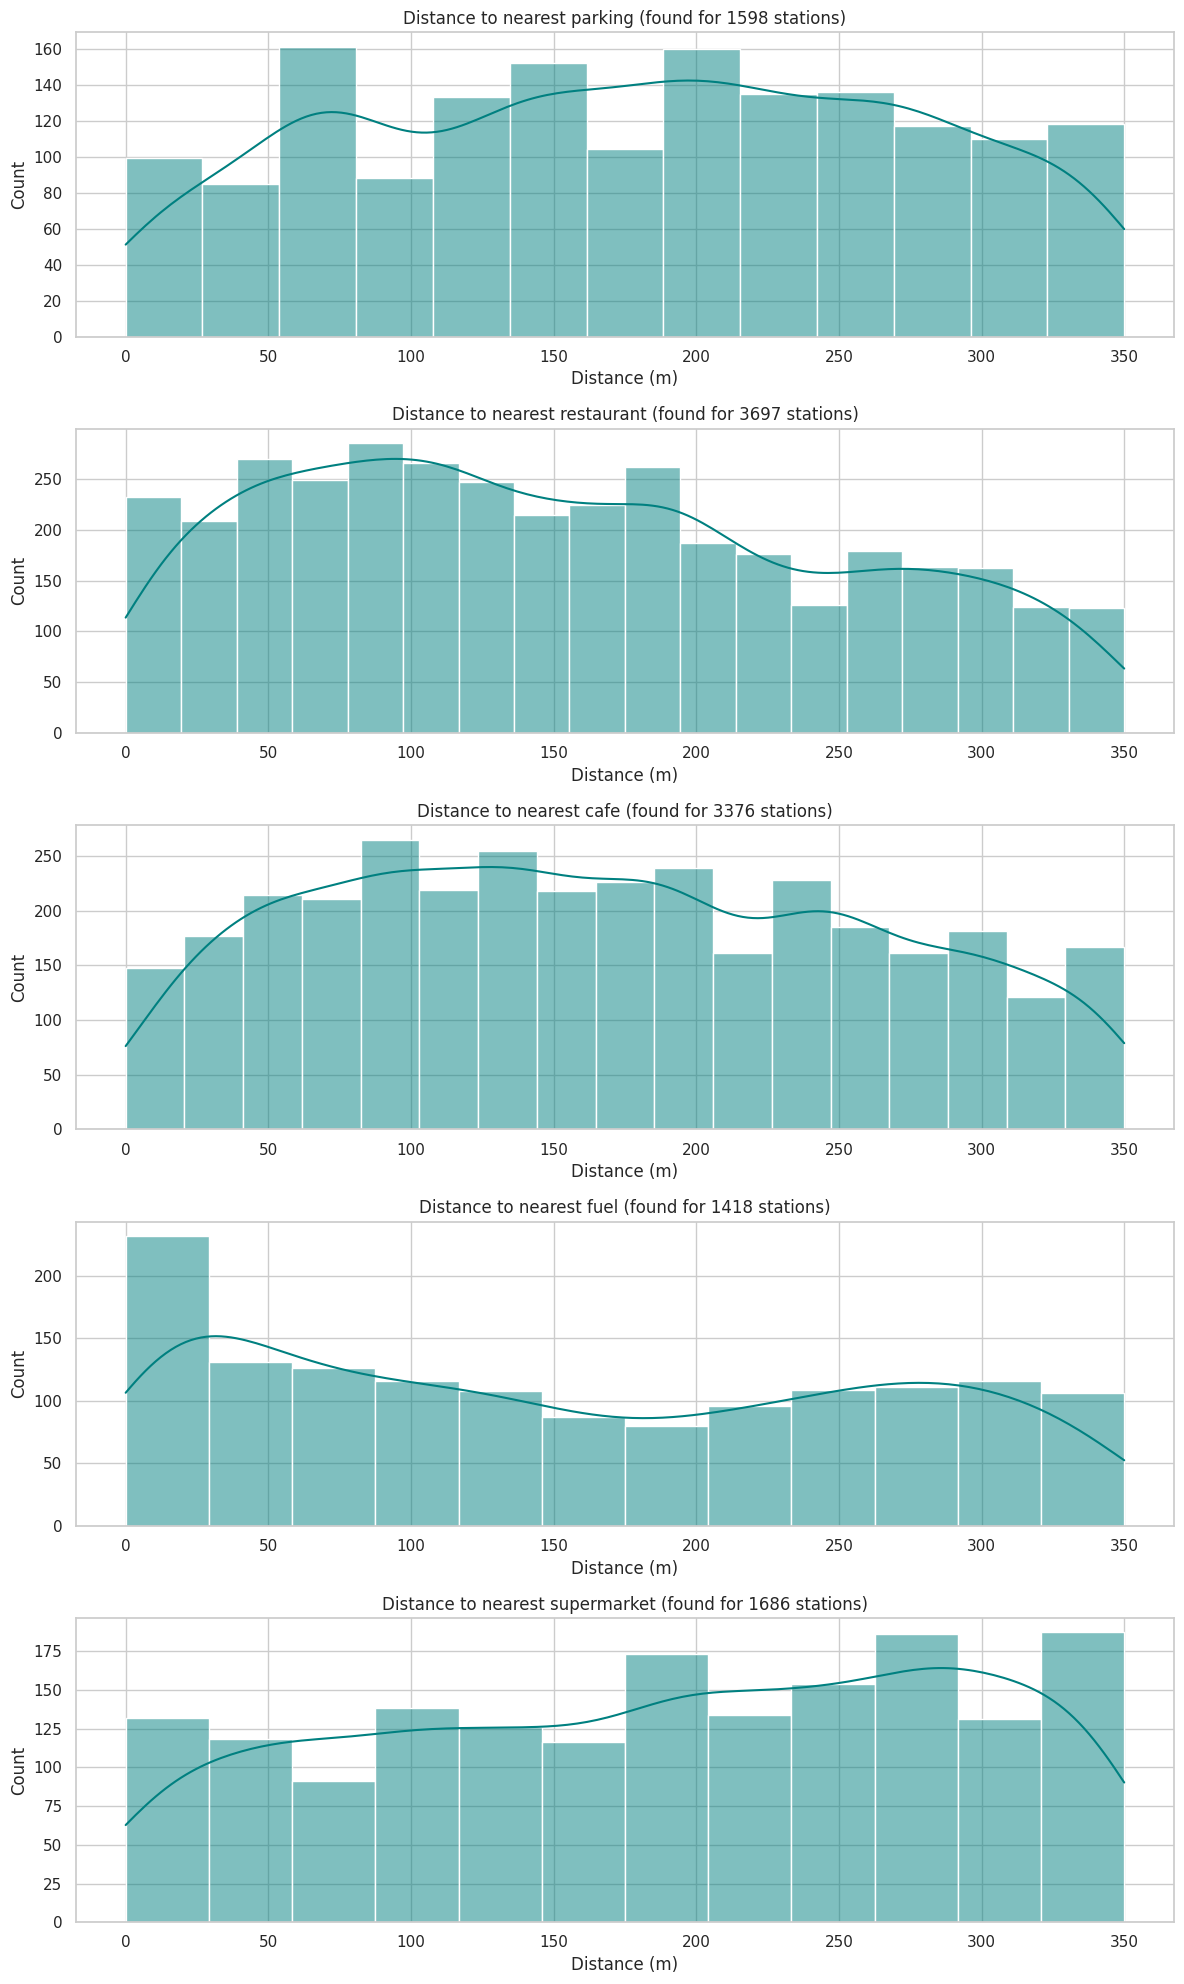

In [33]:
# Example POI analysis: Parking and Restaurants
pois_to_check = ['parking', 'restaurant', 'cafe', 'fuel', 'supermarket']

fig, axes = plt.subplots(len(pois_to_check), 1, figsize=(12, 4 * len(pois_to_check)))

for i, poi in enumerate(pois_to_check):
    d_col = f"{poi}_dist"
    # Filter out -1.0 (missing)
    valid_dist = df_dist[df_dist[d_col] != -1.0][d_col]
    
    sns.histplot(valid_dist, kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'Distance to nearest {poi} (found for {len(valid_dist)} stations)')
    axes[i].set_xlabel('Distance (m)')

plt.tight_layout()
plt.show()